# 📌 Урок: Задачи оптимизации

## 📖 Теоретический минимум

### 🔹 Что такое задачи оптимизации?
Задачи оптимизации — это математические задачи, в которых необходимо найти **лучшее** (оптимальное) решение из множества возможных вариантов.

### 🔹 Классификация задач оптимизации
1. **По типу переменных:**
   - **Непрерывные** (значения переменных могут быть любыми, например, вещественные числа).
   - **Дискретные** (переменные могут принимать только целые значения).
   - **Комбинаторные** (переменные представляют собой комбинации элементов).

2. **По числу экстремумов:**
   - **Линейные** (функция и ограничения линейные).
   - **Нелинейные** (функция или ограничения нелинейные).
   - **Выпуклые** (гарантирован один глобальный минимум).
   - **Невыпуклые** (возможны локальные минимумы и максимумы).

3. **По числу критериев:**
   - **Однокритериальные** (оптимизируется одна функция).
   - **Многокритериальные** (оптимизируются сразу несколько критериев).

### 🔹 Методы решения задач оптимизации
- **Градиентные методы** (используют производные для поиска минимума/максимума).
- **Метод линейного программирования** (например, симплекс-метод).
- **Методы комбинаторной оптимизации** (жадные алгоритмы, динамическое программирование).
- **Эволюционные алгоритмы** (генетические алгоритмы, муравьиные алгоритмы).
- **Методы численной оптимизации** (например, метод Ньютона).

---

## 📖 Материалы

https://vk.com/video302513503_456239460

https://habr.com/ru/articles/474286/

https://vk.com/video121629816_456239397

Грокаем алгоритмы. Иллюстрированное пособие для программистов и любопытствующих от Бхаргава А.

https://docs.sympy.org/latest/index.html

---



# 🏆 Задания

За использование оптимизационных библиотек баллы попалам.

## 1️⃣ Минимизация функции одной переменной
Реализуйте метод **градиентного спуска** для минимизации функции:

\[
f(x) = x^2 + 4x + 4
\]

Найдите минимальное значение функции и точку, в которой оно достигается.

---


Минимальное значение функции: 0.0 достигается в точке -1.9999999999999998


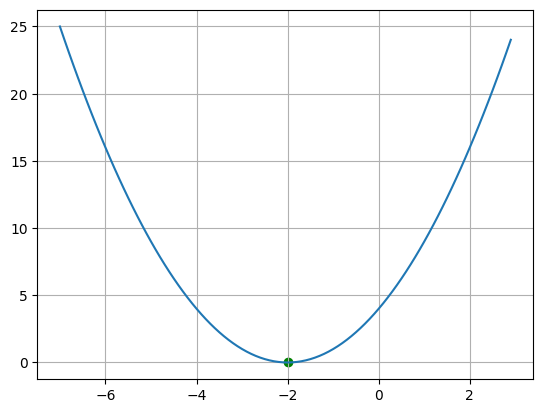

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 4*x + 4

def df(x):
    return 2*x + 4

n = 100
x0 = 0
lmd = 0.2
x_plot = np.arange(-7,3,0.1)
f_plot = [f(x) for x in x_plot]

fig,ax = plt.subplots()
ax.grid(True)

ax.plot(x_plot, f_plot)

point = ax.scatter(x0, f(x0), color = 'green')

for i in range(n):
    x0 = x0 - lmd*df(x0)

    point.set_offsets([x0, f(x0)])

print(f'Минимальное значение функции: {f(x0)} достигается в точке {x0}')


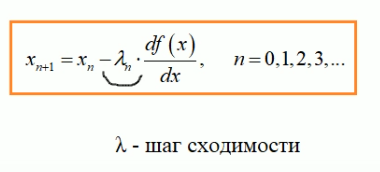


## 2️⃣ Оптимизация производства
Фабрика производит два вида товаров: **A** и **B**.  
Прибыль с одного товара A — **$5$**, с одного товара B — **$3$**.  
Ограничения:
- На производство A уходит **2 часа**, на B — **1 час**.
- Всего доступно **100 часов**.

Сколько товаров A и B нужно выпустить, чтобы максимизировать прибыль?  
Решите задачу линейного программирования с помощью **симплекс метода**.
За решение оптимизационными библиотеками 0,5 балла, за частное решение этой задачи 0,5 балла.

---



Чтобы максимизировать прибыль нужно выпустить  100.0 товаров B. Общая прибыль составит 300.0 


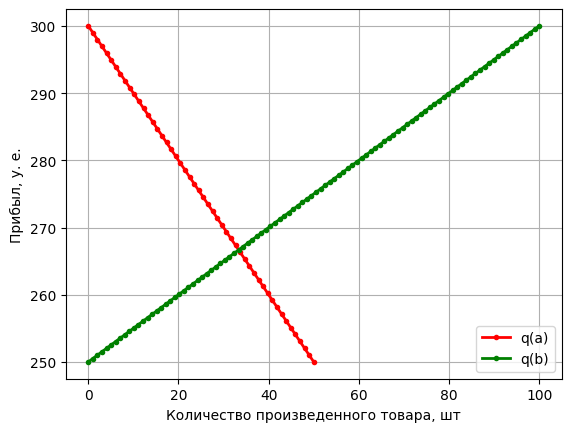

In [103]:
# целевая функция Q = 5a + 3b --> max
# условие 100 = 2a + b
# , где a - количество товаров A, b - количество товаров B


import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 100/2, 50)
q1 = 5*a + 3*(100-2*a)

b = np.linspace(0, 100/1, 100)
q2 = 5*(50-b/2) + 3*b

fig = plt.figure()
plt.plot(a ,q1,'-o',color = 'red', markersize = 2, linewidth = 2, markerfacecolor = 'red', markeredgecolor = 'red', markeredgewidth = 2, label ='q(a)')
plt.plot(b ,q2,'-o',color = 'green', markersize = 2, linewidth = 2, markerfacecolor = 'green', markeredgecolor = 'green', markeredgewidth = 2, label ='q(b)')
plt.grid()
plt.legend()
plt.xlabel('Количество произведенного товара, шт')
plt.ylabel('Прибыл, у. е.')

time = 100
t_A = 2
t_B = 1
c_A = 5
c_B = 3

if c_A/t_A > c_B/t_B:
    print(f'Чтобы максимизировать прибыль нужно выпустить {time/t_A} товаров А и {0} товаров B. Общая прибыль составит {time/t_A * c_A } ')
else:
    print(f'Чтобы максимизировать прибыль нужно выпустить  {time/t_B} товаров B. Общая прибыль составит {time/t_B * c_B} ')


In [122]:
from scipy.optimize import linprog
from sympy import symbols, Matrix
time = 100
t_A = 2
t_B = 1
c_A = 5
c_B = 3

obj = [-c_A,-c_B]

cond_r = [[t_A, t_B]]
cond_l = [time]
bnd = [(0, time/t_A),(0, time/t_B)]
opt = linprog(c=obj, A_eq=cond_r, b_eq= cond_l, bounds=bnd, method='highs')

variables = symbols('a b')
coefficients_matrix = Matrix([
    [c_A, c_B],
    [t_A, t_B]
])
constants_matrix = Matrix([abs(int(opt.fun)), time])
squares_solution = coefficients_matrix.solve_least_squares(constants_matrix)

print(f'Количество единиц товара A составит {squares_solution[0]}, а товара B составит {squares_solution[1]}.')
print('Максимальная прибыль составит:', abs(int(opt.fun)))

Количество единиц товара A составит 0, а товара B составит 100.
Максимальная прибыль составит: 300


## 3️⃣ Комбинаторная оптимизация (Задача рюкзака)
Дан рюкзак ёмкостью **50 кг** и **n** предметов, каждый из которых имеет **вес** и **ценность**.  
Найти, какие предметы нужно выбрать, чтобы **максимизировать общую ценность**, не превышая ограничения по весу.

**Пример входных данных:**
```python
items = [(10, 60), (20, 100), (30, 120)]  # (вес, ценность)
capacity = 50
```
**Ожидаемый результат:**  
Оптимальный набор предметов и максимальная ценность.

---



In [3]:
def max_value(items, capacity):
    sort_items = sorted(items, key=lambda x: (-x[1]/x[0]))
    total = 0
    selected_items = []
    residual = capacity
    # print(sort_items)

    for item in sort_items:
        weight, value = item
        if weight <= residual :
            selected_items.append(item)
            total += value
            residual  -= weight

    return selected_items, total

# Пример использования
items = [(10, 60), (20, 100), (30, 120)]
capacity = 50
selected, total = max_value(items, capacity)

print("Выбранные предметы:", selected)
print("Максимальная ценность:", total)

Выбранные предметы: [(10, 60), (20, 100)]
Максимальная ценность: 160


In [39]:
def knapsack_task(items, capacity):
    n = len(items)
    dp = [[0] * (capacity + 1) for _ in range(n+1)]

    for i in range(1,n+1):
        weight, value = items[i-1]
        for w in range(1,capacity+1):
            if weight > w:
                dp[i][w] = dp[i-1][w]
            else:
                dp[i][w] = max(dp[i-1][w],dp[i-1][w - weight] + value)
        print(f'Шаг: {i}')
        for v in range(n+1):
            print(dp[v], '\n')

    selected = []
    w = capacity
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            selected.append(items[i-1])
            w -= items[i-1][0]

    return selected[::-1], dp[n][capacity]


items = [(10, 60), (20, 100), (30, 120)]
capacity = 50
selected, total =knapsack_task(items, capacity)

print("Оптимальный набор:", selected)
print("Максимальная ценность:", total)

Шаг: 1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Шаг: 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60


## 4️⃣ Оптимизация пути (задача коммивояжёра)
Дан граф с **n** городами и расстояниями между ними.  
Необходимо найти кратчайший путь, проходящий через все города **ровно один раз** и возвращающийся в начальную точку.

**Пример входных данных:**
```python
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]
```
**Ожидаемый результат:**  
Минимальная длина пути и порядок посещения городов.

---




In [142]:
def permutations_arr(arr):
    if len(arr) == 0:
        return []
    if len(arr) == 1:
        return [arr]
    permutations = []
    for i in range(len(arr)):
        first = arr[i]
        rest = arr[:i] + arr[i+1:]
        for p in permutations_arr(rest):
            permutations.append([first] + p)
        # print(permutations)
    return permutations

def optimal_way(graph):
    n = len(graph)
    min_length = float('inf')
    best_way = []
    points = list(range(1, n))
    permutations = permutations_arr(points)

    for perm in permutations:
        current_way = [0] + perm + [0]
        length = 0

        for i in range(len(current_way)-1):
            start = current_way[i]
            finish = current_way[i+1]
            length += graph[start][finish]
        if length < min_length:
            min_length = length
            best_way = current_way

    return min_length, best_way

graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

min_length, way = optimal_way(graph)
print(f"Минимальная длина пути: {min_length}")
print(f"Порядок городов: {way}")

Минимальная длина пути: 80
Порядок городов: [0, 1, 3, 2, 0]



## 5️⃣ Накопленная добыча из скважины

Предположим, что дебит скважины с течением времени уменьшается по определённому закону. Темп падения дебита задан функцией \( Q(t) \), где \( t \) — время в днях, а \( Q(t) \) — дебит в кубических метрах в день на момент времени \( t \).

Для данной задачи темп падения дебита задается функцией:

$$
Q(t) = Q_0 \cdot e^{-\lambda t}
$$

где:
- \( Q_0 \) — начальный дебит (в кубических метрах в день),
- \( \lambda \) — коэффициент падения дебита (в 1/день),
- \( t \) — время (в днях).

Необходимо найти накопленную добычу за период времени от \( t = 0 \) до \( t = T \), то есть посчитать:

$$
D(T) = \int_0^T Q(t) \, dt
$$

Где \( D(T) \) — это накопленная добыча за период времени от 0 до \( T \).

**Входные данные:**
- \( Q_0 = 100 \) м³/день,
- \( lambda = 0.05 \) 1/день,
- \( T = 365 \) дней.

**Ожидаемый результат:**
Вычислить накопленную добычу \( D(T) \).


### Подсказки:
Для вычисления интеграла можно использовать интегрирование из sympy.

---


In [44]:
import sympy as sp

t = sp.symbols('t')
Q0 = 100
lmd = 0.05
T = 365
Q = Q0 * sp.exp(-lmd * t)
D = sp.integrate(Q, (t, 0, T))
print(round(D.evalf()))

2000
